## Logistic Regression

1. Analyze data bankloan.csv
2. Build a logistic regression model
    - target : default
    - features : employ, debtinc,creddebt, othdebt
3. Interpret The Result
4. Validate the model using accuracy in 20% testing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('data/bankloan.csv')
df = raw.copy()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


Keterangan:
1. age : usia nasabah
2. ed : jenjang pendidikan
3. employ : lama kerja
4. address : lama tinggal
5. income : pemasukan per bulan
6. debtinc : persentase hutang dlm income
7. credebt : nominal hutang (satuan ribu dollar)
8. othdebt : nominal hutang dr sumber lain (satuan ribu dollar)
9. default : 1 gagal bayar, 0 tdk gagal bayar

In [3]:
fitur = ['employ', 'debtinc','creddebt', 'othdebt']
target = 'default'

x = df[fitur]
y = df[target]

In [4]:
y

0      1
1      0
2      0
3      0
4      1
      ..
695    1
696    0
697    0
698    0
699    0
Name: default, Length: 700, dtype: int64

In [5]:
x.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


Dari data x.desbribe( yg akan dibutuhkan adalah nilai max dan min utk interpretasi

### Logistic Regression

In [6]:
import statsmodels.api as sm

In [7]:
# model = sm.Logit(y, x) #x yg ditulis tanpa intercept
model = sm.Logit(y, sm.add_constant(x)) #perlu tambahan function sm.add_constant
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


C:\Users\62812\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                  0.2844
Time:                        08:28:08   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

Out yg perlu dibaca :
1. LLR p-value : 2.473e-48 #pengganti F Test dlm Linear Regression
2. p-value :
    - const : 0.000
    - employ : 0.000
    - debtinc :0.000
    - creddebt : 0.000
    - othdebt : 0.940 
3. coef :
    - employ : -0.2436
    - debtinc : 0.0885
    - creddebt : -0.5041
    - othdebt : -0.0040

yang dimodelkan adalah resiko defaul, resiko seseorang akan menjadi buruk pembayaranya
Interpretasi :
1. LLR p-value : 2.473e-48 < 0.05 (tolak H0 artinya minimal salah satu var berpengaruh signifikan thpd resiko default.)
2. p-value :
    - const : 0.000 < 0.0 (tolak H0, model perlu intercept)
    - employ : 0.000 < 0.05 (tolak H0, var berpengaruh significant. Berlaku jika nilai employ antara 0-31)
    - debtinc :0.000 < 0.05 (tolak H0, var berpengaruh significant. Berlaku jika nilai debtinc antara 0.4-41.3)
    - creddebt : 0.000 < 0.05 (tolak H0, var berpengaruh significant. Berlaku jika nilai creddebt antara 0.11696-20.56)
    - othdebt : 0.940 > 0.05 (terima H0, var tidak berpengaruh significant)
3. coef :
    - employ : -0.2436 (semakin lama kerja, kemungkinan default semakin berkurang)
    - debtinc : 0.0885 (semakin banyak persentase hutang dalam income, semakin besar kemungkinan default)
    - creddebt : -0.5041 (semakin besar nominal hutang, semakin kecil kemungkinan default)
    - othdebt : tidak dianggap krn terima H0, var tidak berpengaruh significant

**Untuk Logistic Regression, kita tidak bs lgsg interpretasikan nilai coefnya. Harus diubah ke Odd Ratio**

coef -> OR exp(beta(c-a))

In [9]:
# odd ratio employee
c = 20
a = 15

OR_employ = np.exp(0.2436*(c-a))
print(OR_employ)

3.380420128015566


**artinya:**
Ketika lama kerja meningkat sebesar 5 tahun, kemungkinan default lebih kecil 3.38x. Nilai variabel lain tidak berubah.

In [10]:
# odd ratio debtinc
c = 30
a = 20

OR_debtinc = np.exp(0.0885*(c-a))
OR_debtinc

2.4229843914855502

**artinya:**
Ketika persentase hutang dalam income meningkat sebesar 10 persen, kemungkinan default lebih besar 2.422x. Nilai variabel lain tidak berubah

In [11]:
# odd ratio credebt
c = 15
a = 10

OR_credebt = np.exp(0.5041*(c-a))
OR_credebt

12.434812515742879

**artinya:** Ketika jumlah nominal hutang meningkat sebesar 5 ribu dollar, kemungkinan default lebih kecil 12.43x. Nilai variabel lain tidak berubah

### Multikolinearitas

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
def call_vif(x):
    vif = pd.DataFrame()
    vif['Variabel'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [14]:
call_vif(x)

,Variabel,vif
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


Summary : variabel employ, debtinc, creddebt memiliki nilai VIF < 4 sehingga bisa diterima (tidak adal masalah multicollinearitas). Sehingga interpretasi aman digunakan.

Jika ada ada multikol bisa diremove atau gmn dipenjelasan lain.

### Validasi 20% Data Testing

In [15]:
#utk bagi data 70% training dan 20% testing
from sklearn.model_selection import train_test_split

#utk mengukur performa model
from sklearn.metrics import accuracy_score

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

In [17]:
# sm_Logit_train = sm.Logit(y_train, x_train) #jika tanpa intercept
sm_Logit_train = sm.Logit(y_train, sm.add_constant(x_train)) #jika tanpa intercept
result_train = sm_Logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.408607
         Iterations 7


C:\Users\62812\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
y_prob = result_train.predict(sm.add_constant(x_test)) #hasilnya resiko default
y_class = np.where(y_prob > 0.5, 1, 0) #kelas default atau non default

In [19]:
print('Akurasi: {}%'.format(accuracy_score(y_test,y_class)*100))

Akurasi: 82.14285714285714%


**Artinya:** Jika ada 100 nasabah, sekitar 82 orang nasabah terprediksi default/non-defaultnya akurat

## KNN / K Nearest Neighbor

1. Analyze data white_wine.csv
2. Apply KNN Method (k=3)
    - Target : quality (quality > 6 -> Y=1 good, Y=0 bad)
    - Features : density alcohol
3. Validate the model using accuracy in 20% testing data
4. Apply scaling and validate the model using accuracy in 20% testing data
5. Apply scaling. Choose Factor K based on accuracy:
6. K= (1,3,5,...29)

In [20]:
import pandas as pd
import numpy as np

In [21]:
raw  = pd.read_csv('data/white_wine.csv')
df = raw.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [22]:
df['label'] = np.where(df['quality']> 6, 1,0)
df[df['label']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9962,3.54,0.52,12.4,7.0,1
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9964,3.25,0.55,11.4,7.0,1
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9942,3.33,0.39,12.8,8.0,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9942,3.33,0.39,12.8,8.0,1
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9962,3.17,0.35,11.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,7.4,0.28,0.36,1.1,0.028,42.0,105.0,0.9943,2.99,0.39,12.4,7.0,1
491,7.1,0.23,0.39,1.6,0.032,12.0,65.0,0.9948,3.25,0.40,12.7,7.0,1
507,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.9988,3.64,0.54,10.0,7.0,1
509,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.9988,3.64,0.54,10.0,7.0,1


### Explore Data

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='density', ylabel='alcohol'>

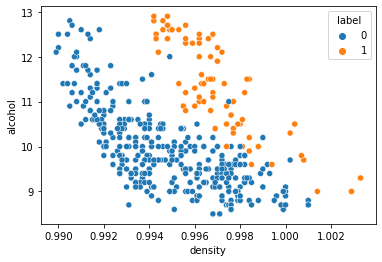

In [24]:
sns.scatterplot(data=df,x='density',y='alcohol', hue='label')

In [25]:
df[['alcohol','density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [26]:
df['alcohol'].unique()

array([ 8.8,  9.5, 10.1,  9.9,  9.6, 11. , 12. ,  9.7, 10.8, 12.4, 11.4,
       12.8, 11.3, 10.5,  9.3, 10. , 10.4, 11.6, 12.3, 10.2,  9. , 11.2,
        8.6,  9.4,  9.8, 11.7, 10.9,  9.1,  8.9, 10.3, 12.6, 10.7, 12.7,
       10.6,  9.2,  8.7, 11.5, 11.8, 12.1, 11.1,  8.5, 12.5, 11.9, 12.2,
       12.9,  nan])

In [27]:
alcohol_mean = df['alcohol'].mean()
alcohol_mean

10.119460500963383

In [28]:
df['alcohol'].fillna(value=df['alcohol'].mean(), inplace=True)
df['alcohol'].unique()

array([ 8.8      ,  9.5      , 10.1      ,  9.9      ,  9.6      ,
       11.       , 12.       ,  9.7      , 10.8      , 12.4      ,
       11.4      , 12.8      , 11.3      , 10.5      ,  9.3      ,
       10.       , 10.4      , 11.6      , 12.3      , 10.2      ,
        9.       , 11.2      ,  8.6      ,  9.4      ,  9.8      ,
       11.7      , 10.9      ,  9.1      ,  8.9      , 10.3      ,
       12.6      , 10.7      , 12.7      , 10.6      ,  9.2      ,
        8.7      , 11.5      , 11.8      , 12.1      , 11.1      ,
        8.5      , 12.5      , 11.9      , 12.2      , 12.9      ,
       10.1194605])

In [29]:
df[['alcohol','density']].isna().sum()

alcohol    0
density    0
dtype: int64

### Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
fitur = ['alcohol', 'density']
target = 'label'

x = df[fitur]
y = df[target]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
# scaler.fit(x_train) #hanya data training, agar data test tidak terlibat dlm permodelan maupun scaller. Jika ada keterlibatan, pengukuran data tdk valid
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train

,alcohol,density
483,9.2,0.9964
343,10.0,0.9931
337,9.3,0.9972
356,9.0,0.9978
145,10.9,0.9905
...,...,...
160,12.4,0.9948
157,12.4,0.9948
91,9.0,0.9957
323,10.4,0.9946


In [36]:
x_train_scaled

array([[0.15909091, 0.48507463],
       [0.34090909, 0.23880597],
       [0.18181818, 0.54477612],
       [0.11363636, 0.58955224],
       [0.54545455, 0.04477612],
       [0.34090909, 0.6119403 ],
       [0.31818182, 0.63432836],
       [0.25      , 0.58955224],
       [0.3680592 , 0.30597015],
       [0.68181818, 0.62686567],
       [0.25      , 0.60447761],
       [0.38636364, 0.67910448],
       [0.65909091, 0.05970149],
       [0.20454545, 0.55970149],
       [0.70454545, 0.47761194],
       [0.11363636, 0.59701493],
       [0.09090909, 0.59701493],
       [0.13636364, 0.67910448],
       [0.13636364, 0.2761194 ],
       [0.40909091, 0.15671642],
       [0.25      , 0.69402985],
       [0.18181818, 0.24626866],
       [0.56818182, 0.29850746],
       [0.31818182, 0.38059701],
       [0.15909091, 0.61940299],
       [0.18181818, 0.28358209],
       [0.04545455, 0.82835821],
       [0.13636364, 0.56716418],
       [0.25      , 0.57462687],
       [0.29545455, 0.29850746],
       [0.

### KNN without scalling 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
knn = KNeighborsClassifier(n_neighbors=3) #sudah definisikan modelnya
knn.fit(x_train,y_train) # training model

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred_class = knn.predict(x_test)

In [40]:
print('accuracy : {}%'.format(accuracy_score(y_test,y_pred_class)*100))

accuracy : 92.3076923076923%


### KNN with scalling

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
knn_with_scaler = KNeighborsClassifier(n_neighbors=3)
knn_with_scaler.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred_class = knn.predict(x_test_scaled)

In [44]:
accuracy_score(y_test, y_pred_class)

0.8173076923076923

NOTE: hasilnya valid karena saat scaler.fit() yg dimasukkan hanya x_train bukan x (train dan tes)

In [45]:
import matplotlib.pyplot as plt

In [46]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
max_train = 0
max_test = 0
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_pred_train = knn.predict(x_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn.predict(x_test_scaled)
    testing_accuracies.append(accuracy_score(y_test, y_pred_test))
    
    if(max_test<testing_accuracies[-1]):
        max_test = testing_accuracies[-1]
        score = i
        
print('max test : {}\nfaktor k : {}'.format(max_test,score))


max test : 0.9807692307692307
faktor k : 7


In [47]:
x_train_scaled.shape

(416, 2)

In [48]:
y_train.shape

(416,)

<AxesSubplot:>

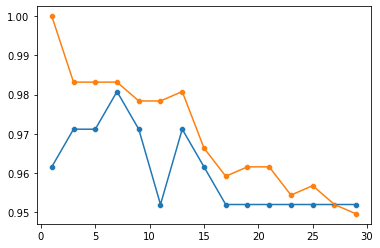

In [49]:
sns.lineplot(x=k, y=testing_accuracies)
sns.scatterplot(x=k, y=testing_accuracies)

sns.lineplot(x=k,y=training_accuracies)
sns.scatterplot(x=k,y=training_accuracies)

## Decision Tree

1. Analyze data white_wine.csv
2. Apply Decision Tree Classification Method (max_depth = 2)
    - Target : quality (quality > 6 -> Y=1)
    - Features : Desinty alcohol
3. Validate the model using accuracy in 20% testing data
4. Apply scaling and validate the model using accuracy in 20% testing data
5. Check the performance is there any difference wheter we applied scaling or not?
6. Check the tree: is there any difference wheter we applied scaling or not?

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [51]:
raw = pd.read_csv('data/white_wine.csv')
df = raw.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [52]:
df['label'] = np.where(df['quality']>6,1,0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


In [53]:
df[['density','alcohol']].isna().sum()

density    0
alcohol    1
dtype: int64

In [54]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)

In [55]:
x = df[['density','alcohol']]
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020 
)

In [56]:
tree = DecisionTreeClassifier(
    max_depth=2,
    criterion='gini'
)

In [57]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [58]:
# without scaling
y_predict_without_scale = tree.predict(x_test)

In [59]:
accuracy_score(y_test,y_predict_without_scale)

0.9423076923076923

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

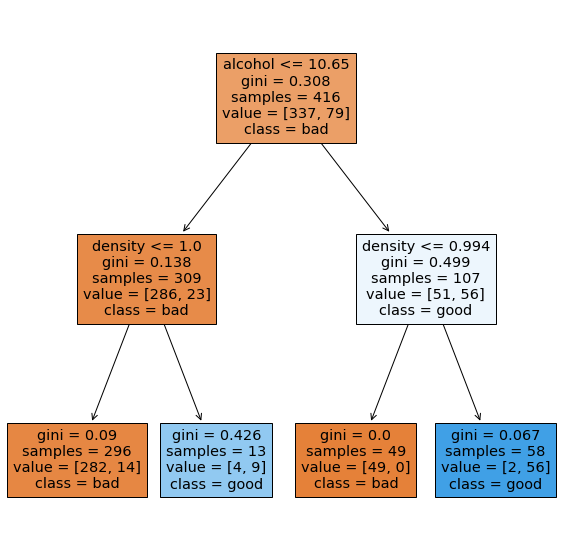

In [61]:
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names = list(x), class_names=['bad','good'], filled=True)
plt.show()

1. alcohol <= 10.65 --> density <= 0.998 --> bad
2. alcohol <= 10.65 --> dencity > 0.998 --> bad
3. alcohol > 10.65 --> density <= 0.994 --> bad
4. alcohol > 10.65 --> density > 0.994 --> good

In [62]:
# with scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
tree_with_scale = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2
)

In [64]:
tree_with_scale.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [65]:
y_predict_with_scale = tree_with_scale.predict(x_test_scaled)

In [66]:
accuracy_score(y_test,y_predict_with_scale)

0.9230769230769231

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

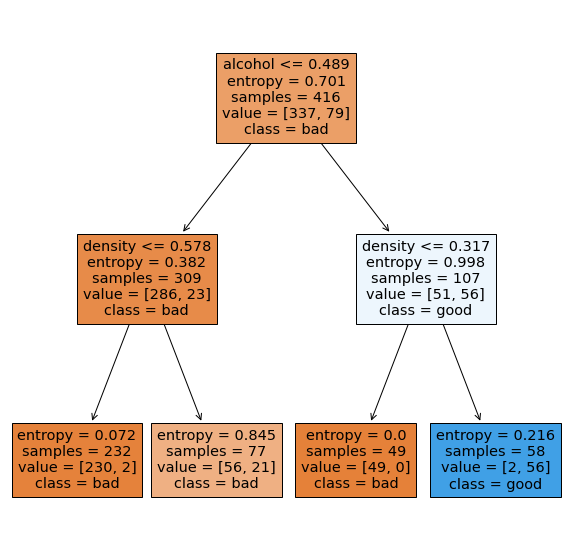

In [68]:
plt.figure(figsize=(10,10))
plot_tree(tree_with_scale, feature_names=list(x),class_names=['bad','good'], filled=True)
plt.show()

In [69]:
df['label'].value_counts()

0    422
1     98
Name: label, dtype: int64